    LaTeX генератор таблиц:

In [42]:
mass = input().split()
for elem in mass:
    print ("$"+elem+"$ & ", end = "")

3814	3634	3462	3242	2970	2698	2605	2498
$3814$ & $3634$ & $3462$ & $3242$ & $2970$ & $2698$ & $2605$ & $2498$ & 

    Теперь основная часть:

In [53]:
import matplotlib.pyplot as plt
from math  import sqrt 
from math  import log
from numpy import exp
import numpy as np

    Считаем по МНК:

In [27]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

In [96]:
rho = 13546 # кг / м^3
g   = 9.81  # м / с^2

CreateExp = lambda k, b, T: exp (k / T + b)

class Plot:
    
    def __init__(self):
        
        self.dH = list(map(float, input().split()))
        self.t  = list(map(float, input().split()))
        
        self.P = [round (i_dH * 10 ** (-3) * rho * g, 0) for i_dH in self.dH]
        self.T = [i_t + 273 for i_t in self.t]
        
        self.lnP = [log (i_P) for i_P in self.P]
        self.invT = [1 / i_T for i_T in self.T]
        
        # y = kx + b
        self.k, self.b, self.sigma_k, self.sigma_b = MNK (self.invT, self.lnP)
        
        self.P_exp = CreateExp (self.k, self.b, np.array(self.T))
        
        print ("P:", *self.P, sep = '\t')
        print ("T:", *self.T, sep = '\t')
        print ("k = ", self.k, " b = ", self.b)
        print ("Eps k = ", self.sigma_k / self.k, "Eps b = ", self.sigma_b / self.b, sep = '\n')

In [95]:
Up_plot = Plot ()

16.5	20.25	20.8	22.25	22.8	24.11	26.75	29.05	30.15	31.05	31.95	33.6	37.05	38.85	41.15	43.05
20	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36
P:	2193.0	2691.0	2764.0	2957.0	3030.0	3204.0	3555.0	3860.0	4007.0	4126.0	4246.0	4465.0	4923.0	5163.0	5468.0	5721.0
T:	293.0	295.0	296.0	297.0	298.0	299.0	300.0	301.0	302.0	303.0	304.0	305.0	306.0	307.0	308.0	309.0
k =  -5194.484504862793  b =  25.46898970861421
Eps k =  -0.02349548585420714  b =  0.00024917459520538466


In [97]:
Down_plot = Plot ()

43.05	40.35	39.15	35.85	35.3	34.15	33	30.6	28.7	27.35	26.05	24.4	22.35	20.3	19.6	18.8
36	35	34	33	32	31	30	29	28	27	26	25	24	23	22	21
P:	5721.0	5362.0	5202.0	4764.0	4691.0	4538.0	4385.0	4066.0	3814.0	3634.0	3462.0	3242.0	2970.0	2698.0	2605.0	2498.0
T:	309.0	308.0	307.0	306.0	305.0	304.0	303.0	302.0	301.0	300.0	299.0	298.0	297.0	296.0	295.0	294.0
k =  -5063.210786566041  b =  25.0534373368503
Eps k = 
-0.024790095224473174
Eps b = 
0.00025419307005536857


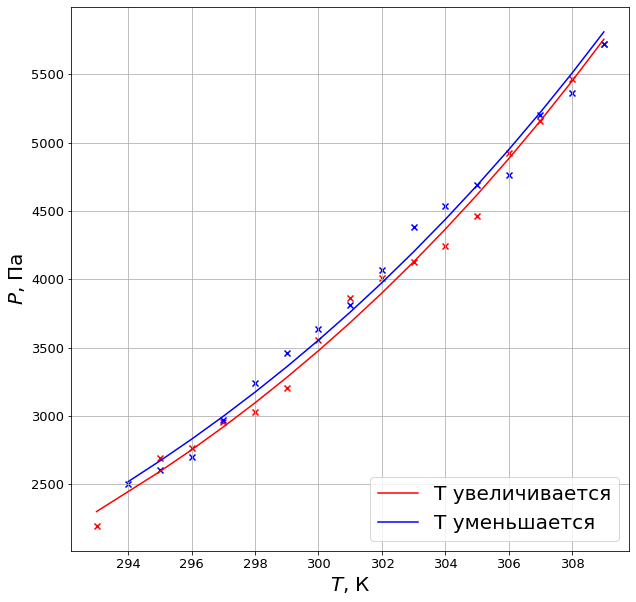

In [93]:
# P (T)

plt.rc('font', size = 13) 

fig1 = plt.figure(figsize = (10, 10))
ax   = fig1.add_subplot(1,1,1)

ax.plot    (Up_plot.T, Up_plot.P_exp, color = "red", label = "T увеличивается");
ax.scatter (Up_plot.T, Up_plot.P,     color = "red", marker = 'x');

ax.plot    (Down_plot.T, Down_plot.P_exp, color = "blue", label = "T уменьшается");
ax.scatter (Down_plot.T, Down_plot.P,     color = "blue", marker = 'x');

ax.set_xlabel('$T$, К',  fontsize = 20)
ax.set_ylabel('$P$, Па', fontsize = 20)

plt.legend(loc='lower right', fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/Plot1.pdf")

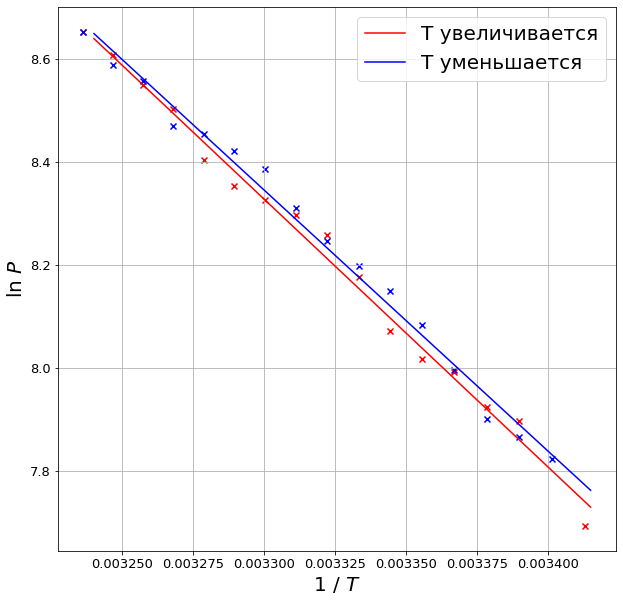

In [90]:
# P (T)
plt.rc('font', size = 13) 

fig2 = plt.figure(figsize = (10, 10))
ax   = fig2.add_subplot(1,1,1)

const_start = 0.00324
const_end   = 0.003415

ax.plot ([const_start, const_end], [Up_plot.k * const_start + Up_plot.b, Up_plot.k * const_end + Up_plot.b], color = "red", label = "T увеличивается");
ax.scatter (Up_plot.invT, Up_plot.lnP,     color = "red", marker = 'x');

ax.plot ([const_start, const_end], [Down_plot.k * const_start + Down_plot.b, Down_plot.k * const_end + Down_plot.b], color = "blue", label = "T уменьшается");
ax.scatter (Down_plot.invT, Down_plot.lnP,     color = "blue", marker = 'x');

ax.set_xlabel('$1~/~T$',fontsize = 20)
ax.set_ylabel('$\ln~P$', fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/Plot2.pdf")